# EXPLORATORY DATA ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [19]:
# Eliminamos las variables menos relevantes
df = df.drop(columns=['day_of_week', 'contact', 'month', 'duration', 'campaign', 'pdays', 'default'])

In [20]:
df.describe()

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [21]:
df.describe(include=object)

,job,marital,education,housing,loan,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2
top,admin.,married,university.degree,yes,no,nonexistent,no
freq,10422,24928,12168,21576,33950,35563,36548


In [ ]:
# Convertimos las variables categoricas en numericas

from sklearn.preprocessing import LabelEncoder

df['job'] = LabelEncoder().fit_transform(df['job'])
df['marital'] = LabelEncoder().fit_transform(df['marital'])
df['education'] = LabelEncoder().fit_transform(df['education'])
df['housing'] = LabelEncoder().fit_transform(df['housing'])
df['loan'] = LabelEncoder().fit_transform(df['loan'])
df['poutcome'] = LabelEncoder().fit_transform(df['poutcome'])
df['y'] = LabelEncoder().fit_transform(df['y'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   housing         41188 non-null  int64  
 5   loan            41188 non-null  int64  
 6   previous        41188 non-null  int64  
 7   poutcome        41188 non-null  int64  
 8   emp.var.rate    41188 non-null  float64
 9   cons.price.idx  41188 non-null  float64
 10  cons.conf.idx   41188 non-null  float64
 11  euribor3m       41188 non-null  float64
 12  nr.employed     41188 non-null  float64
 13  y               41188 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 4.4 MB


In [29]:
df.describe()


,age,job,marital,education,housing,loan,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,1.071720,0.327425,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.985314,0.723616,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,2.000000,0.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,2.000000,0.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.00000,3.000000,7.000000,2.000000,2.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [31]:
## Normalizamos los datos
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Crear el scaler
scaler = MinMaxScaler()

# Normalizar el DataFrame
df_normalizado = pd.DataFrame(scaler.fit_transform(df), 
                             columns=df.columns)

## UNIVARIATE ANALYSIS

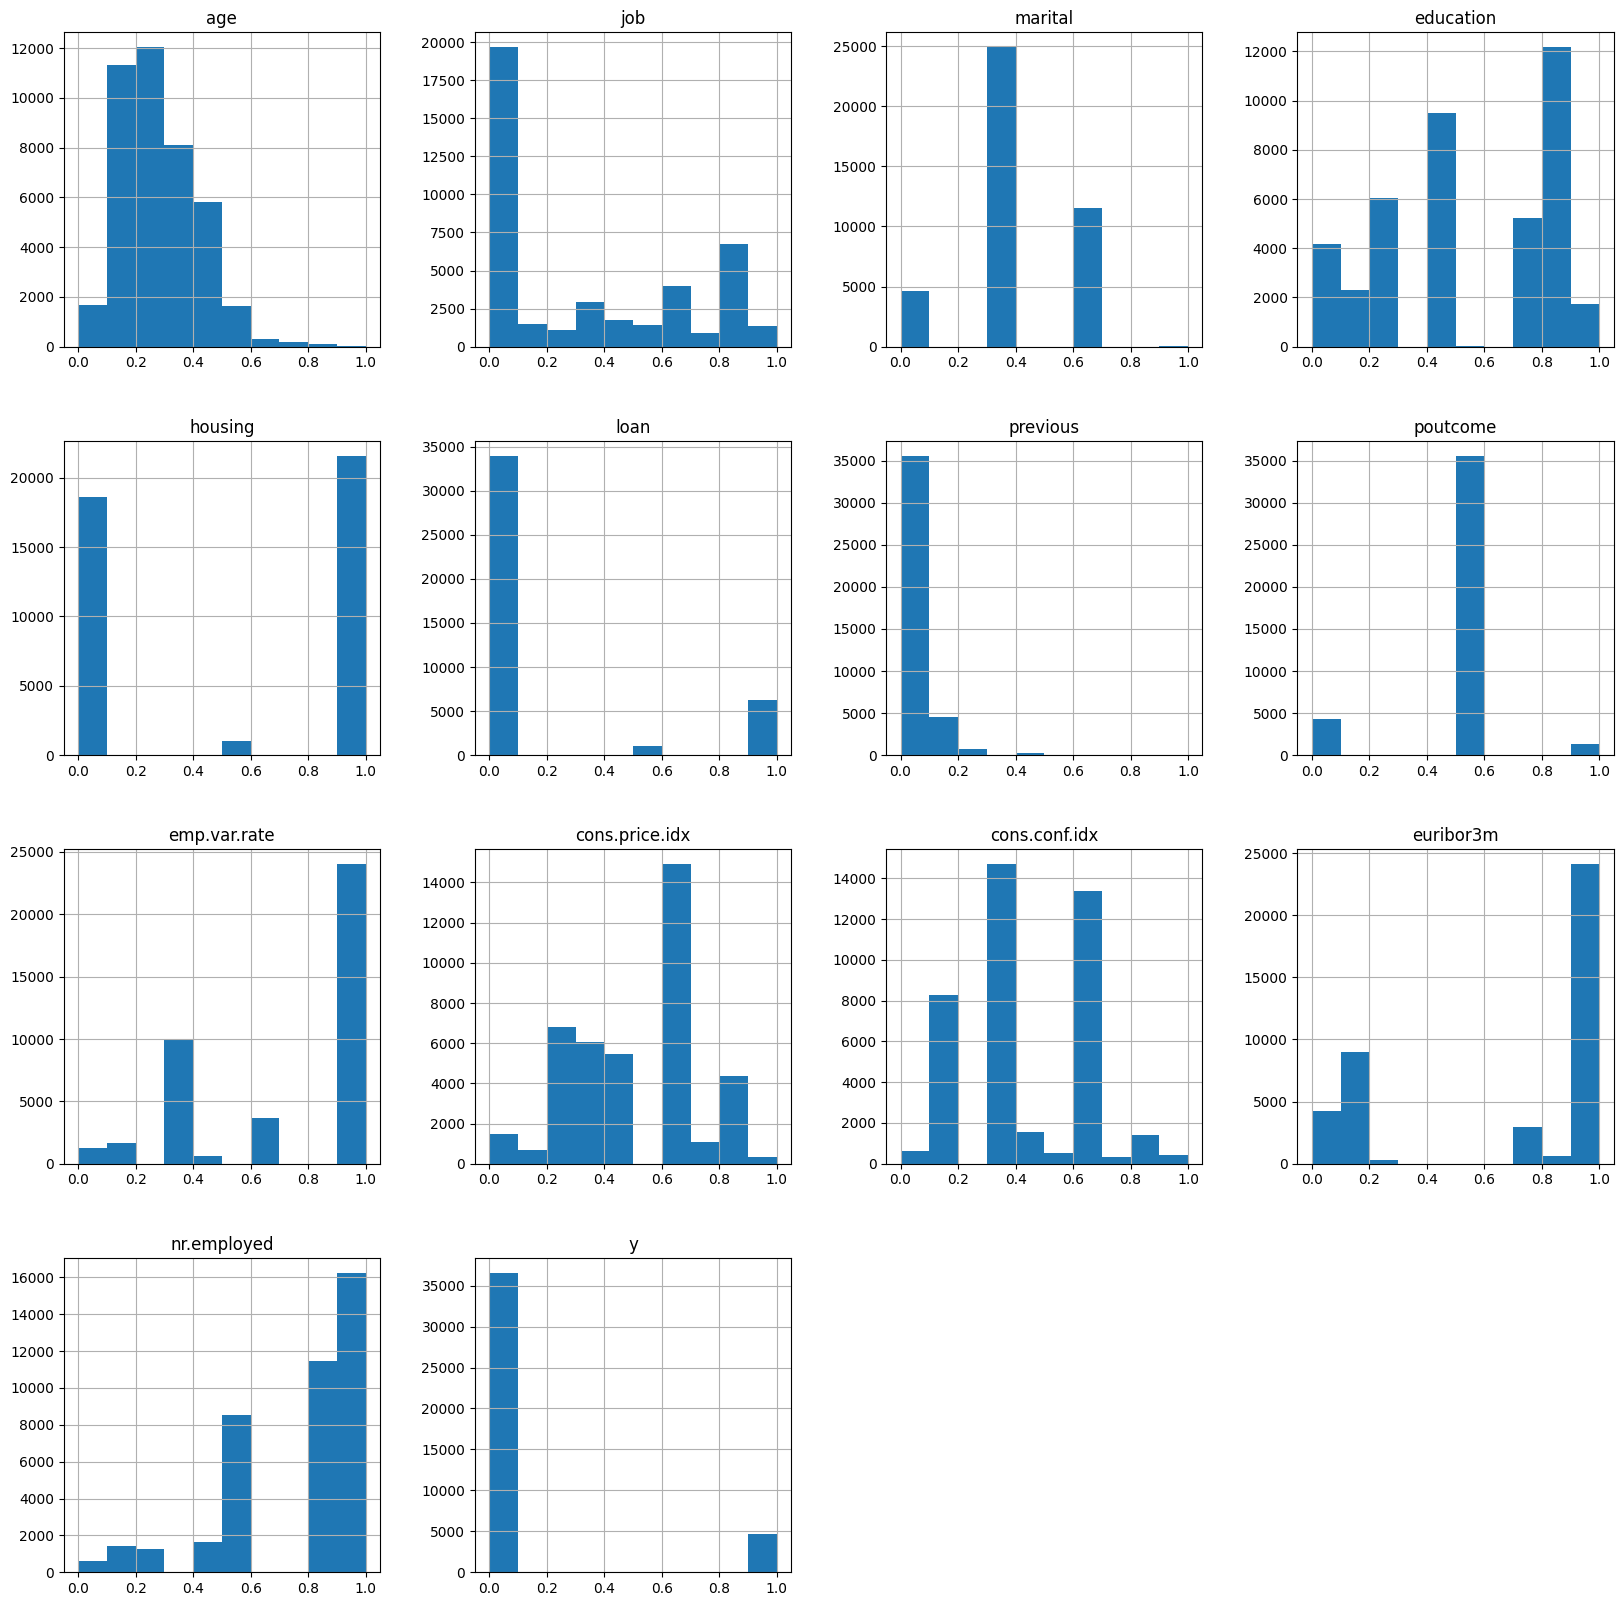

In [32]:
df_normalizado.hist(figsize=(20,20))
plt.show()

## MULTIVARIATE ANALYSIS

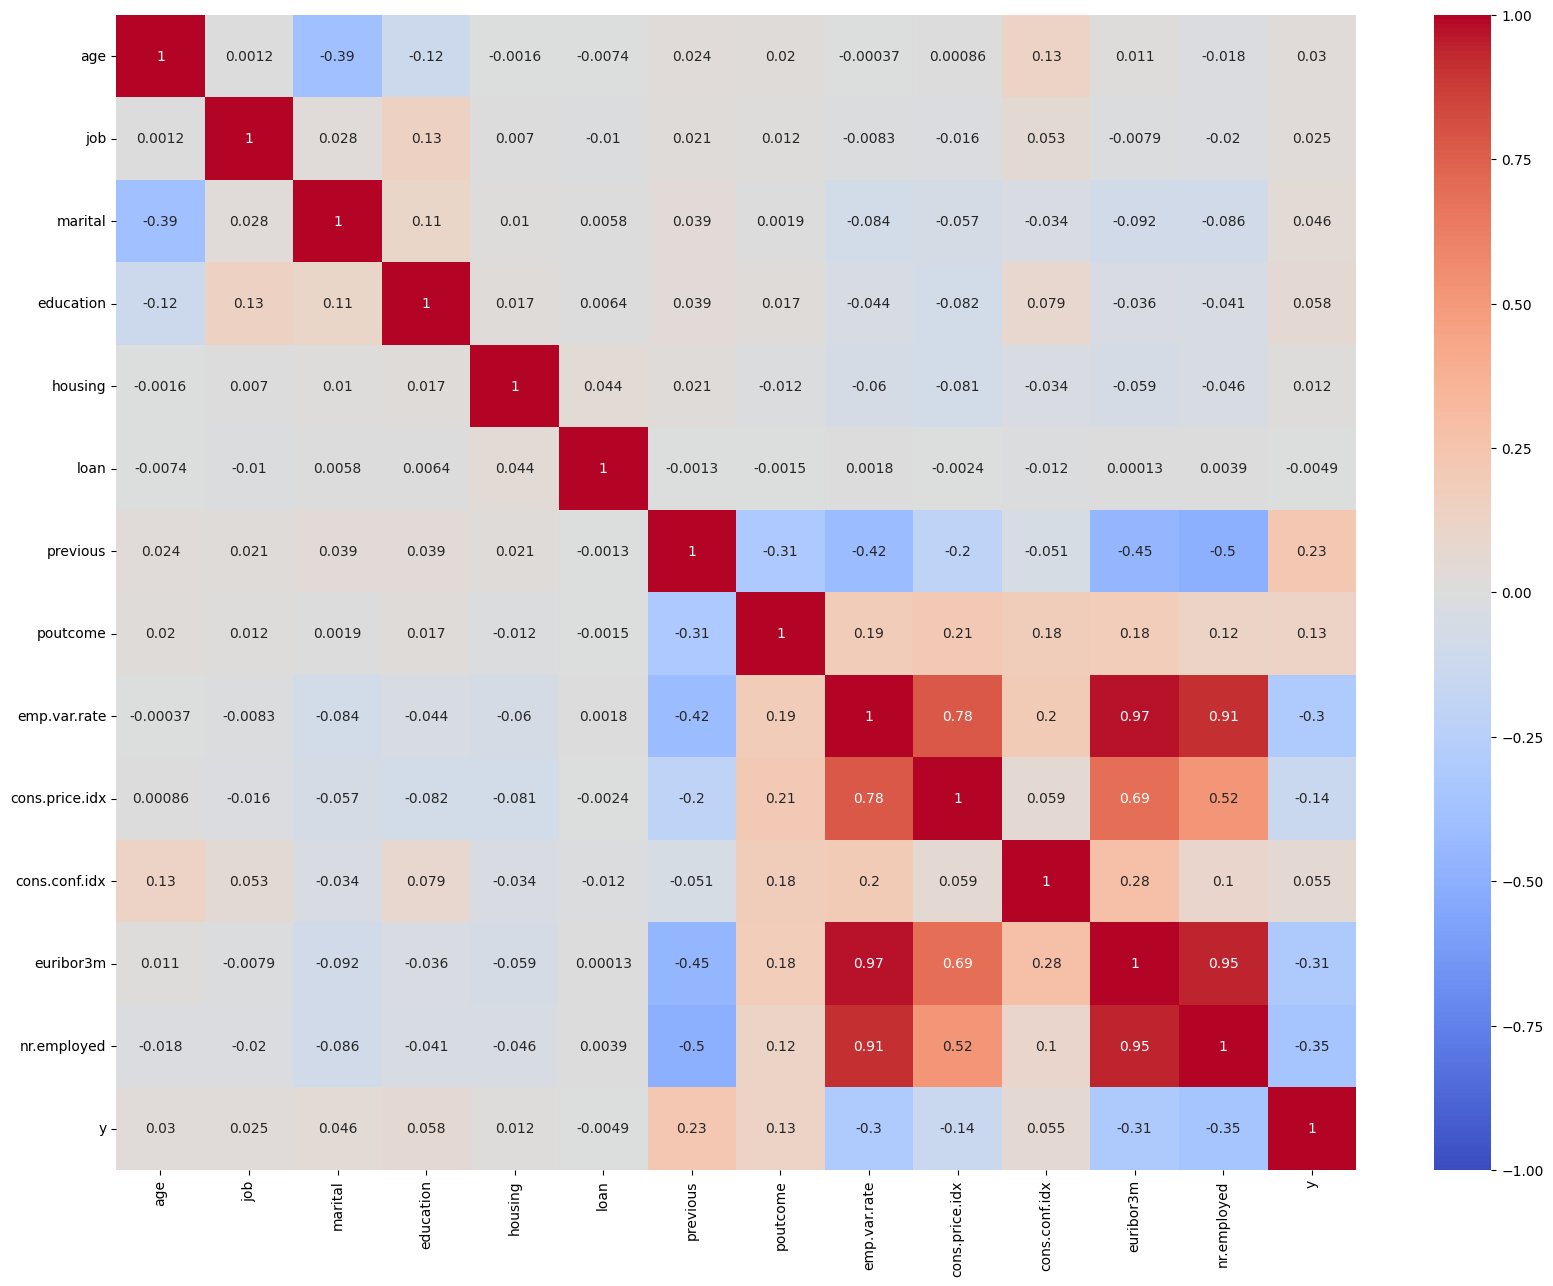

In [33]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_normalizado.select_dtypes(include='number').corr(), vmin = -1, vmax = 1, annot = True, cmap='coolwarm')
plt.show()

## LOGISTIC REGRESSION MODEL

In [35]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_normalizado, test_size=0.2, random_state=42)
X_train = df_train.drop('y', axis=1).reset_index(drop= True)
y_train = df_train['y'].reset_index(drop= True)
X_test = df_test.drop('y', axis=1).reset_index(drop= True)
y_test = df_test['y'].reset_index(drop= True)   

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.], shape=(8238,))

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8970623937848993

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.10281621752852634
Coeficiente de determinación: -0.021862087296920407


## GRID SEARCH

In [39]:
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [40]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [41]:
model_grid = LogisticRegression(penalty = "l1", C = 10, solver = "liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8971837824714737